## **<center><h1>CALIFORNIA HOUSING PRICE</h1></center>**
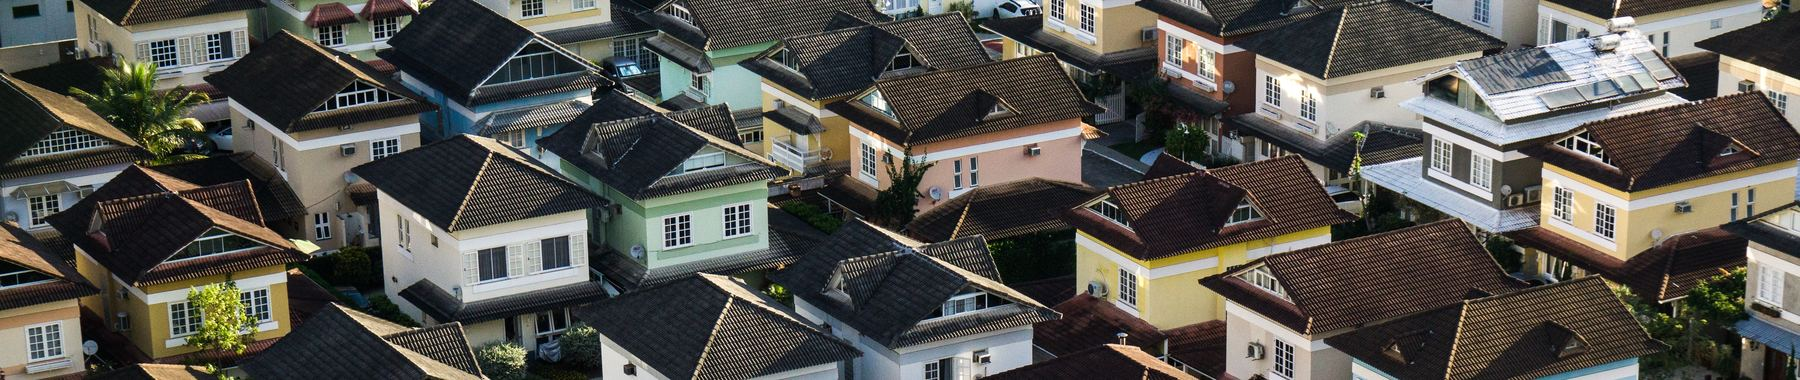
<center>By Muttyara Kintan<center> 

**Source Dataset** : [data_california_house.csv](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo)  

# **BUSINESS PROBLEMS & DATA UNDERSTANDING**

## Context

Manusia memiliki tiga faktor kebutuhan primer seperti sandang, pangan dan papan. Pentingnya papan dalam kehidupan manusia tercermin melalui properti seperti rumah. Harga rumah di setiap negara berbeda-beda. Untuk saat ini, di Negara Amerika Serikat memang menjadi kawasan dengan harga tertinggi untuk properti seperti rumah.

Dengan jumlah penduduk lebih dari 39,2 juta jiwa dalam wilayah dengan total area sekitar 163.696 mil persegi (423.970 km²). California merupakan negara bagian Amerika Serikat yang terpadat. Menurut kepadatan penduduk California berada diurutan terbesar ketiga berdasarkan wilayah. California juga merupakan entitas subnasional terpadat di Amerika Utara dan ke-34 terpadat di dunia.

Salah satu yang melakukan pendataan adalah Miller Samuel Inc. Lembaga ini telah menghabiskan beberapa tahun terakhir mengumpulkan semua penjualan rumah keluarga tunggal dan kondominium dengan harga di atas USD 50 juta di Amerika Serikat.

## Problem Statement

Dalam project ini, terdapat sebuah Developer Properti di California **mengalami issue dalam meningkatkan revenue dan profit**. Salah satu penyebabnya yaitu karena pendekatan strategi marketing yang tidak tepat, dimana Developer Properti tersebut menawarkan dan mengeluarkan budget untuk membangun sebuah rumah untuk seluruh tipenya.

Oleh sebab itu, Developer tersebut perlu memprediksi dan menganalisa agar dapat menentukan harga rumah yang kompetitif namun tetap terjangkau oleh masyarakat di daerah tersebut. Sehingga pihak Developer Properti tetap mendapatkan profit dari hasil penjualan rumah.

## Goals

Berdasarkan permasalahan yang sudah dijabarkan diatas, akan lebih mudah jika Developer Properti memiliki sebuah aplikasi untuk dapat mempermudah dalam **menentukan harga sebuah rumah yang akan dibangun** dengan melihat dari data demografis. Hal ini bertujuan agar pengolahan data tidak lagi dilakukan secara manual, sehingga dapat mempercepat dalam proses pengambilan keputusan strategi marketing.

## Analytic Approach

Yang dapat kita lakukan dalam melakukan analisis data yaitu dengan **menentukan pola dari fitur-fitur yang ada dan membedakan satu perumahan dengan perumahan lainnya**.

Selanjutnya, kita akan membuat aplikasi untuk suatu model regresi yang akan membantu Developer Properti untuk membantu dalam melakukan prediksi harga rumah yang akan mereka bangun. Hal ini bertujuan untuk **memperkirakan budget membangun perumahan secara maksimal agar tetap menghasilkan keuntungan finansial yang maksimal** dan tentunya dengan value yang dapat bersaing di daerah tersebut.

## Metric Evaluation

Evaluasi metrik yang akan digunakan adalah `RMSE`, `MAE`, `MAPE` dan `R-Squared`. Dimana **RMSE adalah nilai rataan akar kuadrat dari error**, **MAE adalah rataan nilai absolut dari error**, **MAPE adalah rataan persentase error yang dihasilkan oleh model regresi**. 

Perlu kita ketahui apabila **semakin kecil nilai RMSE, MAE, MAPE yang dihasilkan**, berarti model **semakin akurat dalam memprediksi** harga sewa sesuai dengan limitasi fitur yang digunakan. 

Sedangkan **R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data**. **Semakin mendekati 1**, maka **semakin fit pula modelnya terhadap data observasi**. Namun, metrik ini tidak valid untuk model non-linear.

## Data Understanding

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Longitude coordinates |
| latitude | Float | Latitude coordinates |
| housing_median_age | Float | Median age of a house within a block |
| total_rooms | Float | Total number of rooms within a block |
| total_bedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | A group of people residing within a home unit, for a block  |
| median_income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| median_house_value | Float | Median house value for households within a block (measured in US Dollars) |
| ocean_proximity | object  | Location of the house w.r.t ocean/sea |

<br>

# **IMPORT LIBRARY & LOAD DATASET**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# PCA
from sklearn.decomposition import PCA

# Machine Learning Algoritma
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore warnings until end
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


# **EXPLANATORY DATA ANALYSIS**

Sebelum menganalisa data, kita perlu melakukan pengecekan terhadap data yang hilang atau data yang duplikat. Hal ini perlu dilakukan agar terhindar dari kesalahan yang dapat mempengaruhi proses analisa selanjutnya.

In [3]:
print('Pada data frame terdapat', df.shape[0], 'baris dan', df.shape[1], 'kolom.')

Pada data frame terdapat 14448 baris dan 10 kolom.


Dataset merupakan data dari rata-rata harga rumah di Negara California pada tahun 1990. Pada data frame diatas, terdapat 14.448 baris dan 10 kolom. Dimana setiap baris data merepresentasikan informasi terkait properti perumahan.

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

Pada kolom `ocean_proximity` memiliki nilai yang paling tinggi yaitu sebanyak 6.369 orang yang memilih perumahan dekat dengan `<1H OCEAN`. Hal ini menandakan bahwa perumahan yang paling diminati yaitu yang lokasi rumah dekat dengan laut.

In [51]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13055.000000,13055.000000,13055.00000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000
mean,-119.580899,35.670202,29.01509,2300.133282,478.175642,1288.318805,447.219763,3.587721,189269.053773
std,2.005525,2.160803,12.28545,1298.658210,264.097702,732.872589,245.549974,1.446815,95703.013959
min,-124.350000,32.540000,1.00000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.770000,33.940000,19.00000,1408.000000,293.000000,781.000000,276.000000,2.502700,114700.000000
50%,-118.520000,34.280000,29.00000,2043.000000,428.000000,1149.000000,401.000000,3.402800,171400.000000
75%,-118.010000,37.730000,37.00000,2937.500000,613.000000,1657.000000,574.000000,4.503300,243500.000000
max,-114.310000,41.950000,52.00000,7483.000000,1494.000000,4930.000000,1492.000000,8.000000,500000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Tipe data diatas sudah sesuai dengan featurenya masing-masing. Terdaoat 10 feature pada dataset, dimana:
- 9 feature merupakan data dengan tipe numerikal kontinus yaitu longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value.
- 1 feature merupakan data dengan tipe objek yaitu ocean_proximity.

## Data Cleaning

### Data Duplicate

In [6]:
print('Apakah ada data yang duplikat?', 'Ada' if df.isna().sum().any() == False else 'Tidak ada')
print('Data duplikat pada data frame sebanyak', df.duplicated().sum(), 'kolom.')

Apakah ada data yang duplikat? Tidak ada
Data duplikat pada data frame sebanyak 0 kolom.


Tidak ditemukan data duplikat pada dataset sehingga tidak perlu melakukan drop pada dataset.

### Missing Value 

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**Missing value** adalah nilai yang tidak terdeteksi pada dataset. Bisa berupa blank cell atau simbol tertentu seperti NaN (Not a Number) atau NA (Not Available). Missing value perlu diatasi karena dapat menjadi masalah dalam melakukan analisis data, sehingga dapat mempengaruhi hasil analisis.  

Dari hasil diatas **terdapat missing value pada kolom `total_bedrooms` sebanyak 137 data yang hilang**. Kita tidak akan melakukan drop karena dapat mengurangi isi dari data yang  hilang. Solusi lainnya, kita dapat melakukan mengisi nilai yang hilang pada kolom tersebut dengan median dari variabel itu sendiri.

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Setelah dilakukan handling missing value, data yang hilang atau NaN sudah memiliki nilai dari median variabel itu sendiri.

### Corelation

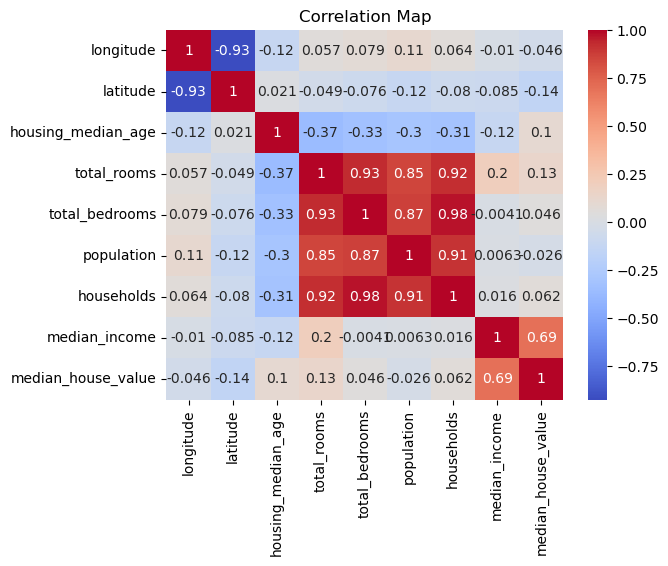

In [10]:
matrix_corr = df.corr()

sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

Korelasi dikatakan semakin kuat apabila :
- Koefisien korelasi antara 0,81 - 1,00 berarti hubungan antara dua variabel sangat kuat.
- Koefisien korelasi antara 0,61 - 0,81 berarti hubungan antara dua variabel kuat.
- Koefisien korelasi antara 0,41 - 0,60 berarti hubungan antara dua variabel sedang.
- Koefisien korelasi antara 0,21 - 0,41 berarti hubungan antara dua variabel lemah.
- Koefisien korelasi antara 0,00 - 0,21 berarti hubungan antara dua variabel tersebut tidak memiliki hubungan.

Dapat disimpulkan bahwa jika nilai korelasi mendekati angka 0 hingga 1, maka terdapat hubungan yang positif sempurna antara dua variabel. Semakin tinggi nilai korelasi maka semakin kuat hubungan antara dua variabel tersebut.

Hubungan antara feature `households` dengan `total_bedrooms` memiliki nilai korelasi paling tinggi yaitu sebesar 0,98. Dari kedua feature tersebut dapat dibuktikan apabila dalam satu rumah tangga memiliki jumlah anggota yang cukup banyak, maka jumlah kamarnya pun juga akan semakin banyak untuk dapat menampung anggota keluarga tersebut. 

### Outlier

In [11]:
num_feat = ['longitude', 'latitude', 'housing_median_age', 
            'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', 'median_house_value']

In [12]:
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')
    print('_________________________')

In [13]:
find_outlier(df,"housing_median_age")

Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________


In [14]:
for i in num_feat :
    find_outlier(df, i)

Outlier longitude
IQR: 3.799999999999997
limit_bawah: -127.5
limit_atas: -112.30000000000001
_________________________
Outlier latitude
IQR: 3.780000000000001
limit_bawah: 28.259999999999998
limit_atas: 43.38
_________________________
Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________
Outlier total_rooms
IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5
_________________________
Outlier total_bedrooms
IQR: 349.0
limit_bawah: -227.5
limit_atas: 1168.5
_________________________
Outlier population
IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0
_________________________
Outlier households
IQR: 325.0
limit_bawah: -208.5
limit_atas: 1091.5
_________________________
Outlier median_income
IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001
_________________________
Outlier median_house_value
IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0
_________________________


In [15]:
out1 = df[df['housing_median_age'] >= 65.5]
out2 = df[df['total_rooms'] > 5693.5]
out3 = df[df['total_bedrooms'] > 1168.5]
out4 = df[df['population'] > 3134.0]
out5 = df[df['households'] > 1091.5]
out6 = df[df['median_income'] > 7.984350000000001]
out7 = df[df['median_house_value'] > 480350.0]

In [16]:
out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0
13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0
22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0
45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0
...,...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0
14411,-117.31,33.00,30.0,1631.0,310.0,665.0,297.0,6.8443,NEAR OCEAN,492500.0


In [17]:
out_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 5 to 14446
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2095 non-null   float64
 1   latitude            2095 non-null   float64
 2   housing_median_age  2095 non-null   float64
 3   total_rooms         2095 non-null   float64
 4   total_bedrooms      2095 non-null   float64
 5   population          2095 non-null   float64
 6   households          2095 non-null   float64
 7   median_income       2095 non-null   float64
 8   ocean_proximity     2095 non-null   object 
 9   median_house_value  2095 non-null   float64
dtypes: float64(9), object(1)
memory usage: 180.0+ KB


In [18]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


14.500276854928018

Setelah kita melakukan pengecekan terhadap outlier diatas, kita mendapatkan hasil total outlier adalah 2095 data atau sebanyak 14,5% dari total data.

Bila semua outlier di drop maka akan ada banyak data yang hilang. Oleh sebab itu, saya memutuskan untuk menghapus beberapa outlier yang memiliki nilai yang relatif tinggi dibandingkan dengan data lain. Outlier yang akan dihilangkan akan diinterpretasikan pada boxplot di bawah ini.

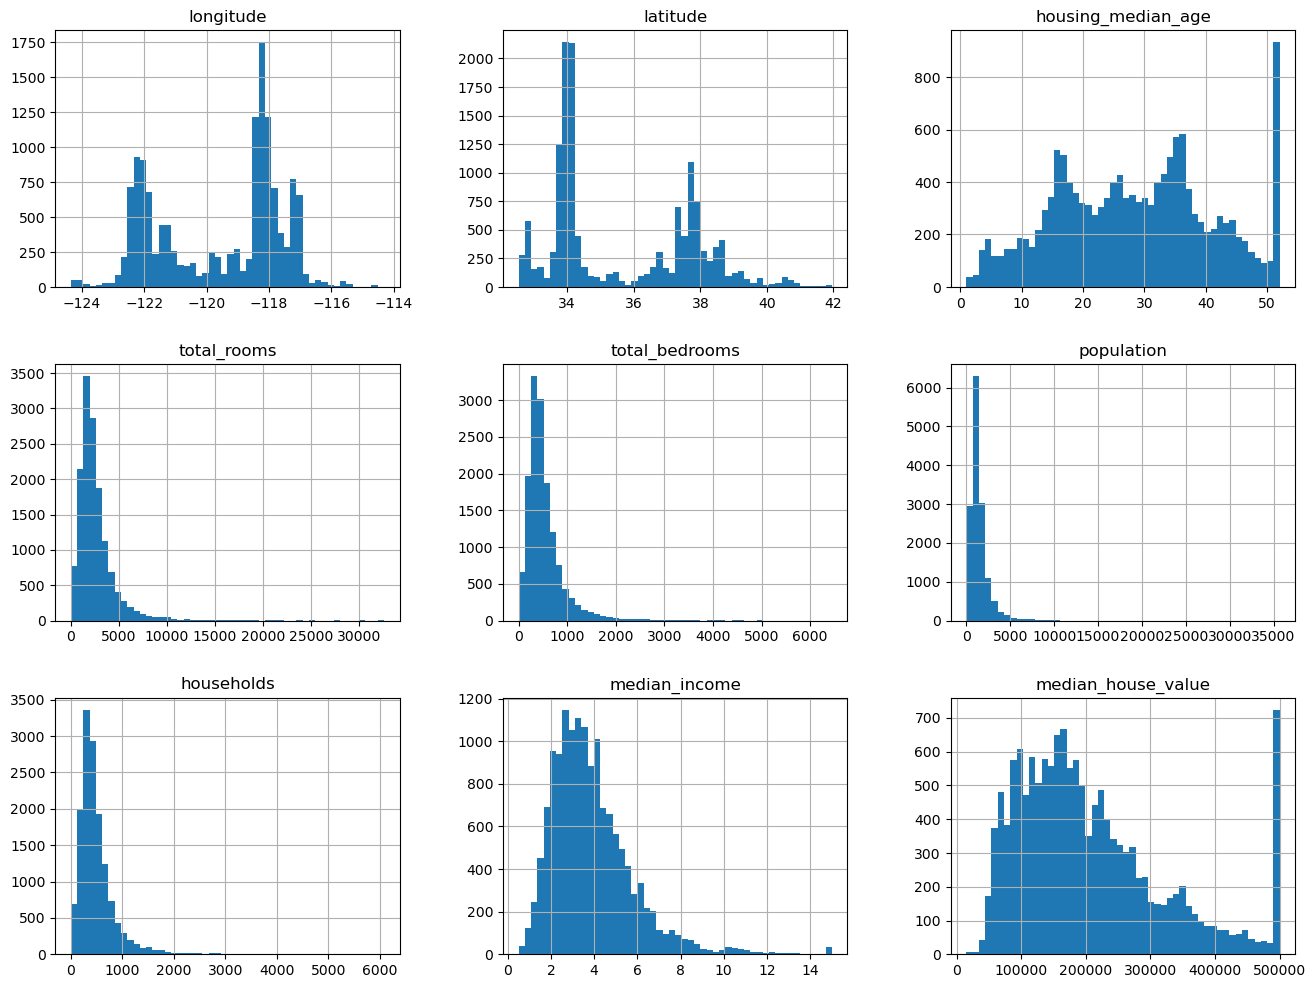

In [19]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

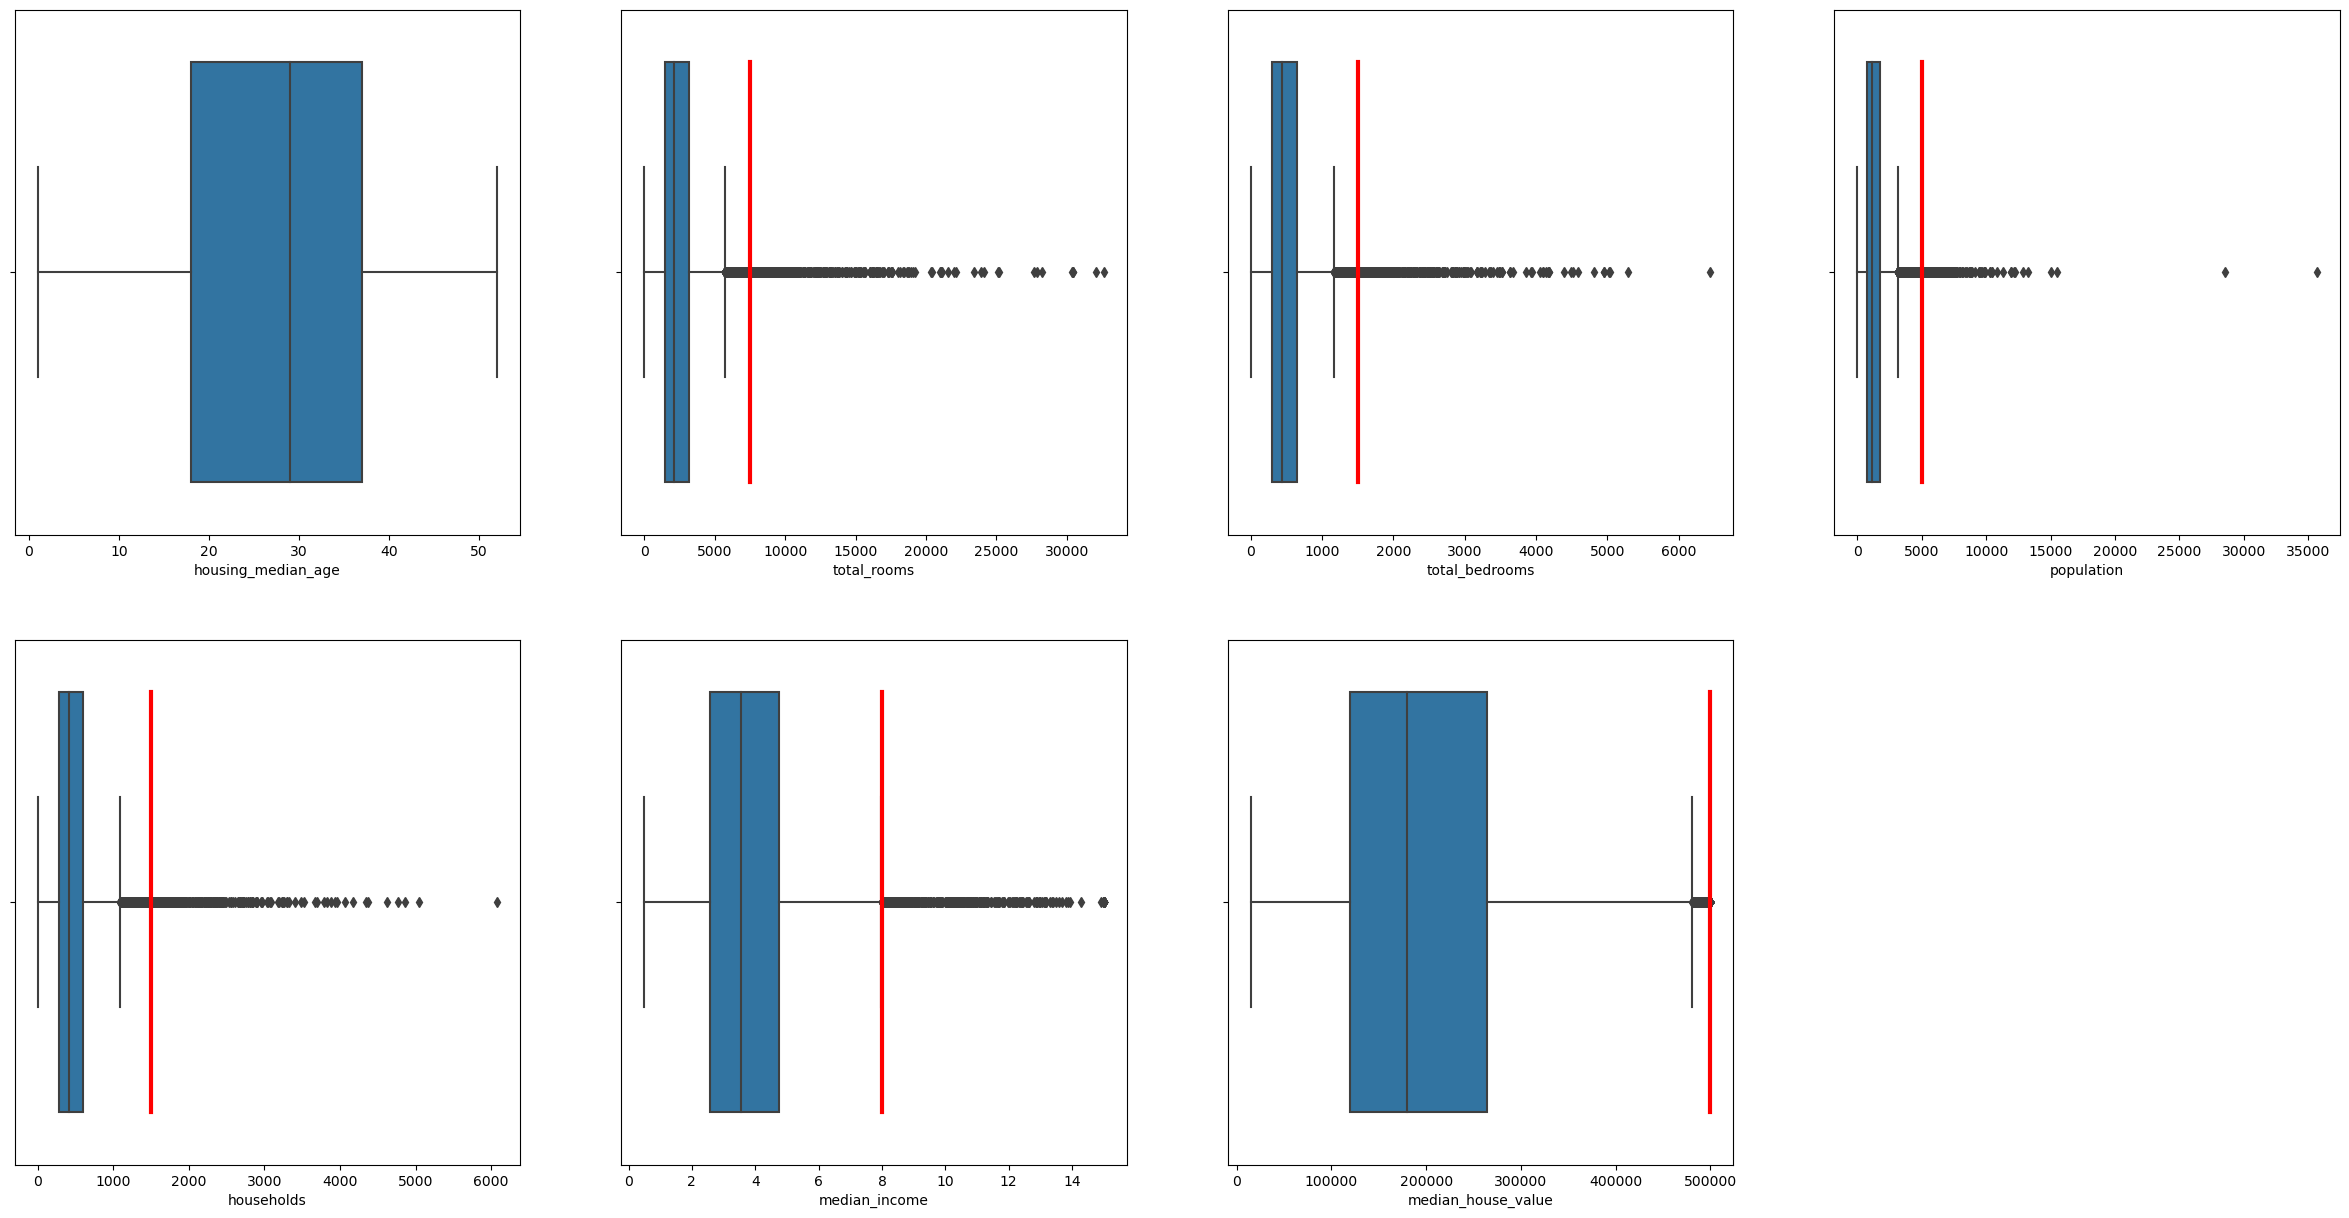

In [20]:
plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
sns.boxplot(df['housing_median_age'])
plt.subplot(2,4,2)
sns.boxplot(df['total_rooms'])
plt.plot([7500, 7500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,3)
sns.boxplot(df['total_bedrooms'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,4)
sns.boxplot(df['population'])
plt.plot([5000, 5000], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,5)
sns.boxplot(df['households'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,6)
sns.boxplot(df['median_income'])
plt.plot([8, 8], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,7)
sns.boxplot(df['median_house_value'])
plt.plot([500000, 500000], [-0.4, 0.4], linewidth=3, c='r')
plt.show()

Outlier yang akan kita hilangkan adalah outlier yang melebihi garis merah karena memiliki jarak antar data yang relatif tinggi. Pada feature `median_house_value` di batasi sampai value 500.000, untuk membatasi model prediksi.

In [21]:
out1 = df[df['total_rooms'] > 7500]
out2 = df[df['total_bedrooms'] > 1500]
out3 = df[df['population'] > 5000]
out4 = df[df['households'] > 1500]
out5 = df[df['median_income'] > 8]
out6 = df[df['median_house_value'] > 500000]

out_all = pd.concat([out1, out2, out3, out4, out5, out6], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0
13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0
22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0
45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0
...,...,...,...,...,...,...,...,...,...,...
14302,-122.42,37.80,52.0,741.0,170.0,277.0,165.0,4.4712,NEAR BAY,500001.0
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


In [22]:
out_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 5 to 14413
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1393 non-null   float64
 1   latitude            1393 non-null   float64
 2   housing_median_age  1393 non-null   float64
 3   total_rooms         1393 non-null   float64
 4   total_bedrooms      1393 non-null   float64
 5   population          1393 non-null   float64
 6   households          1393 non-null   float64
 7   median_income       1393 non-null   float64
 8   ocean_proximity     1393 non-null   object 
 9   median_house_value  1393 non-null   float64
dtypes: float64(9), object(1)
memory usage: 119.7+ KB


In [23]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


9.641472868217054

Setelah outliernya dihilangkan, kita mendapatkan hasil 1393 data atau sebanyak 9,64% dari total data. 

#### Handling Outlier

In [24]:
df.drop(out_all.index, axis = 0, inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13055 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13055 non-null  float64
 1   latitude            13055 non-null  float64
 2   housing_median_age  13055 non-null  float64
 3   total_rooms         13055 non-null  float64
 4   total_bedrooms      13055 non-null  float64
 5   population          13055 non-null  float64
 6   households          13055 non-null  float64
 7   median_income       13055 non-null  float64
 8   ocean_proximity     13055 non-null  object 
 9   median_house_value  13055 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


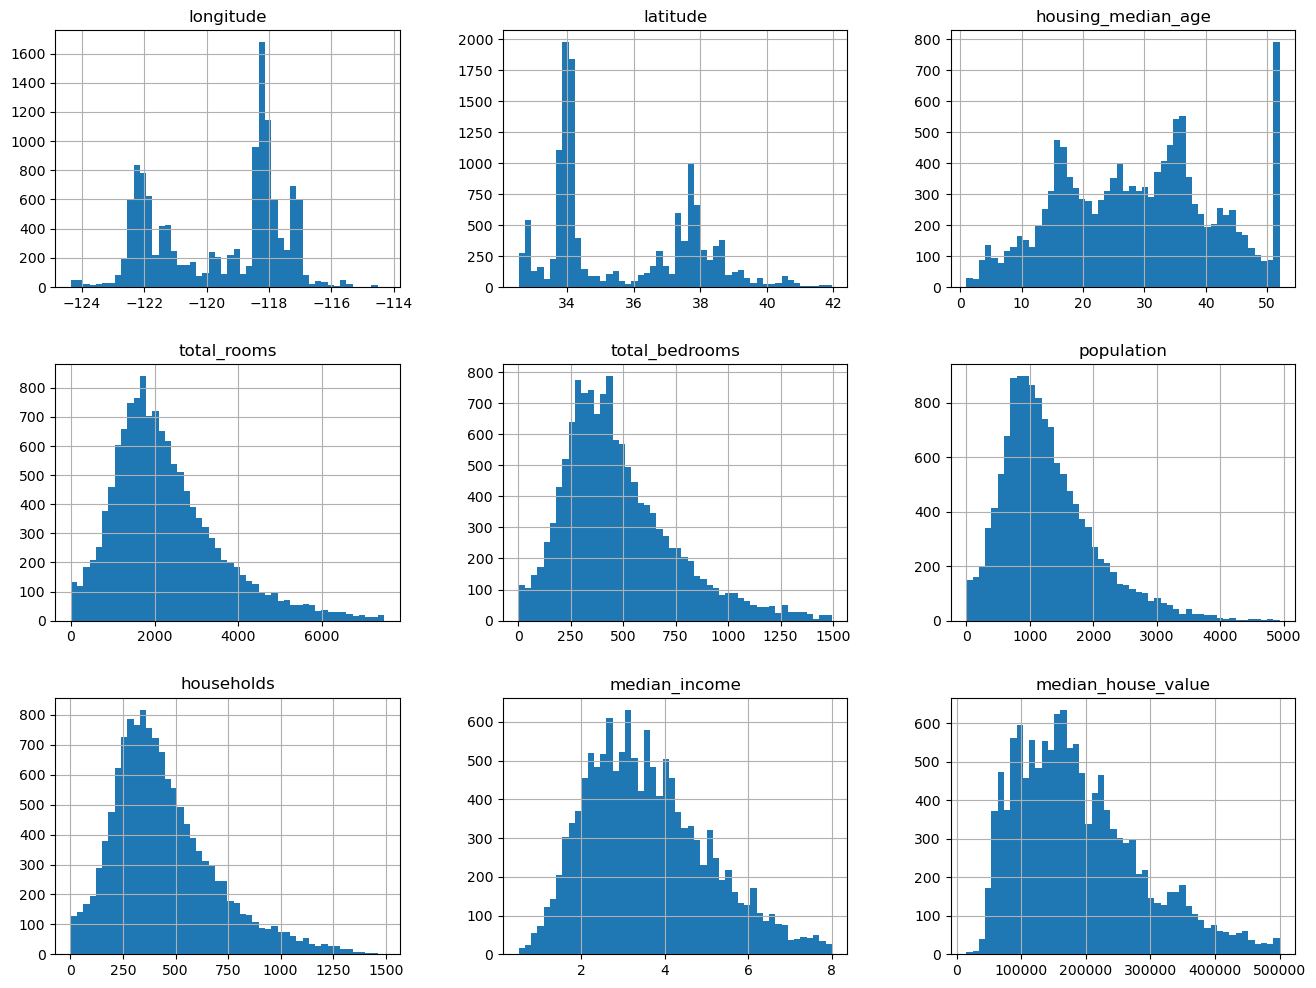

In [26]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

Dapat kita lihat pada histogram diatas, bahwa pengurangan data yang dilakukan pada outlier dapat membuat data menjadi distribusi normal daripada data sebelumnya. 

## Data Unik & Clean

In [27]:
tipe = []
jumlah = []
sample = []
kosong = []
maksimal = []

for i in df.columns :
    sample.append(df[i].unique()[:8])
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)
    kosong.append(df[i].isna().sum())
    maksimal.append(df[i].max())

pd.DataFrame({'dataFeatures':df.columns,
              'dataType':tipe,
              'Nunique':jumlah,
              'Unique':sample,
              'NaN':kosong,
              'Max':maksimal
             })

,dataFeatures,dataType,Nunique,Unique,NaN,Max
0,longitude,float64,795,"[-119.79, -122.21, -118.04, -118.28, -119.81, ...",0,-114.31
1,latitude,float64,831,"[36.73, 37.77, 33.87, 34.06, 38.69, 37.28, 37....",0,41.95
2,housing_median_age,float64,52,"[52.0, 43.0, 17.0, 50.0, 18.0, 4.0, 31.0, 27.0]",0,52.0
3,total_rooms,float64,4559,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 3917.0,...",0,7483.0
4,total_bedrooms,float64,1326,"[28.0, 328.0, 396.0, 1196.0, 194.0, 638.0, 133...",0,1494.0
5,population,float64,3014,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 1809.0, ...",0,4930.0
6,households,float64,1245,"[40.0, 277.0, 364.0, 1000.0, 167.0, 564.0, 124...",0,1492.0
7,median_income,float64,8670,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 5.2586,...",0,8.0
8,ocean_proximity,object,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]",0,NEAR OCEAN
9,median_house_value,float64,3438,"[47500.0, 100000.0, 285800.0, 175000.0, 59200....",0,500000.0


Ada beberapa hal yang bisa kita pahami dari kolom diatas, antara lain :
1. Dataset `California Housing Price` memiliki 9 kolom dan 2095 baris. Namun setelah dilakukan handling pada missing value dan outlier, dataset `California Housing Price` memiliki 9 kolom dan 13055 baris.
2. Tipe data pada masing-masing feature sudah sesuai. 
    - Kolom `ocean_proximity` memiliki data tipe object yang berisi kategori. 
    - Kolom `longitude`,`latitude`,`housing_median_age`,`total_rooms`,`total_bedrooms`	`population`,`households`,`median_income`,`ocean_proximity`	`median_house_value` memiliki data tipe float yang berisi nilai numerik kontinus.

## Data Visualization

Karena ada informasi geografis (lintang dan bujur), mari kita buat scatterplot semua distrik untuk memvisualisasikan data.

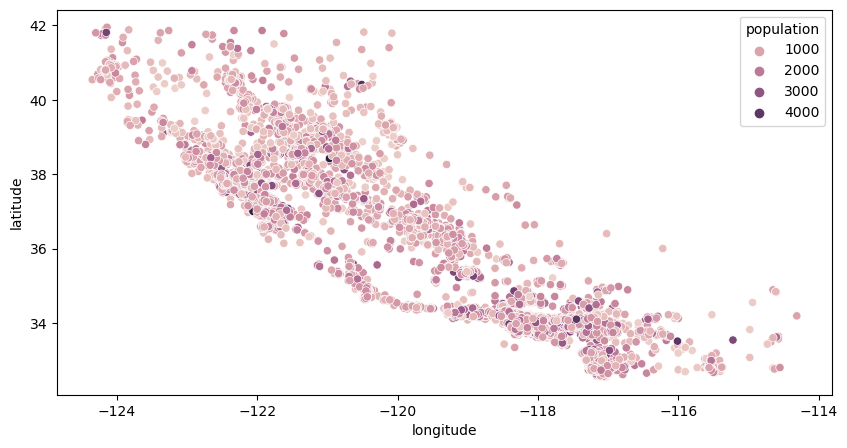

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='population')
plt.show()

Dari hasil visualisasi diatas kita tidak dapat melihat pola tertentu dengan jelas. Mari kita visualisasikan ditempat mana saja yang memiliki kepadatan titik data yang tinggi.

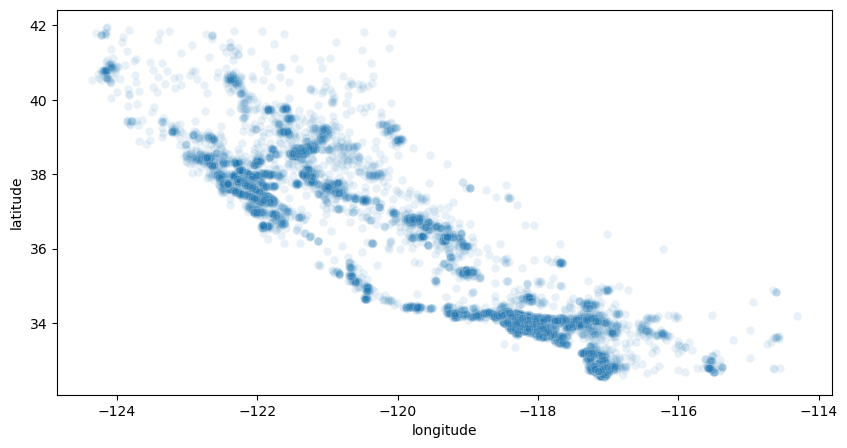

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.1)
plt.show()

Sekarang kita dapat melihat dengan jelas daerah dengan kepadatan tinggi ditandai dengan warna biru tua yang terlihat jelas.

Terakhir kita akan mengecek harga rumah dan populasi distrik ke plot yang tersebar.

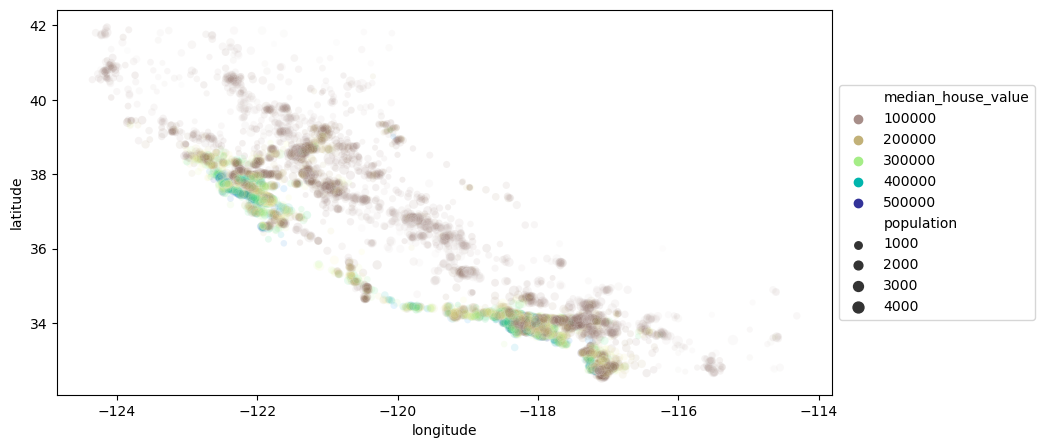

In [30]:
plt.figure(figsize=(10, 5))
g = sns.scatterplot(data=df, x='longitude', y='latitude',
                    hue='median_house_value', size='population',
                    alpha=0.1, palette="terrain_r")
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Seperti yang dapat kita lihat, warna yang lebih tua menunjukkan bahwa harga rumah dengan lokasi memiliki hubungan yang kuat (misalnya, dekat dengan laut) dan kepadatan penduduk.

# **FEATURE ENGINEERING**

## Spliting Data

In [31]:
# Define x,y
x = df.drop(columns='median_house_value')
y = df['median_house_value']

# Spliting dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 20)

## Data Transforming

In [32]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['longitude','latitude','housing_median_age',
                                'total_rooms','total_bedrooms','population',
                               'households','median_income']),
    ('binary', BinaryEncoder(), ['ocean_proximity'])
], remainder = 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('binary', BinaryEncoder(),
                                 ['ocean_proximity'])])

Transforming adalah proses pengubahan data mentah menjadi data yang dapat diproses oleh model machine learning. Robust Scaler adalah teknik normalisasi yang dapat digunakan untuk mengubah skala data yang memiliki outlier. Binary Encoding adalah teknik encoding yang dapat digunakan untuk mengubah data kategorikal menjadi data numerikal. 
- Pada kolom `longitude`,`latitude`,`housing_median_age`,`total_rooms`,`total_bedrooms`,`population`,`households`,`median_income` dilakukan transforming dengan Robust Scaler.
- Pada kolom `ocean_proximity` dilakukan transforming dengan Binary Encoder.

## Benchmark Model

In [33]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Metrik diatas digunakan untuk menunjukkan scoring pada proses benchmark model dan hyperparameter tuning.

### Cross Validation

In [34]:
# Define Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
tree = DecisionTreeRegressor()
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

Disini kita menggunakan 5 algoritma model yang akan diuji, yaitu :
1. Linear Regresi
2. K-Neighbors Regressor
3. Random Forest Regressor
4. Decision Tree Regressor
5. XGBoost Regressor

In [35]:
models = [lr, knn, rf, tree, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])
    
    # RMSE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_root_mean_squared_error' 
    )

    score_rmse.append(cv_score.round(1))
    nilai_mean_rmse.append(cv_score.mean())
    nilai_std_rmse.append(cv_score.std())
    
    # MAE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_mean_absolute_error' 
    )

    score_mae.append(cv_score.round(1))
    nilai_mean_mae.append(cv_score.mean())
    nilai_std_mae.append(cv_score.std())
    
    # MAPE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_mean_absolute_percentage_error' 
    )

    score_mape.append(cv_score.round(1))
    nilai_mean_mape.append(cv_score.mean())
    nilai_std_mape.append(cv_score.std())

In [36]:
pd.DataFrame({
    'Model': ['KNN', 'XGBoost', 'Decision Tree', 'Random Forest', 'Linear Regression'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,KNN,-60324.521158,1428.572555,-44619.032174,862.026142,-0.277515,0.005071
1,XGBoost,-57009.298174,1133.026350,-39864.982633,624.989577,-0.233415,0.007068
2,Decision Tree,-48343.625006,1448.403169,-32554.178621,735.652729,-0.194677,0.002966
3,Random Forest,-68259.946022,2128.212464,-45234.918230,940.641465,-0.260592,0.004916
4,Linear Regression,-45489.101301,706.571371,-30859.939721,420.119128,-0.184325,0.004288


Dari hasil cross validation yang telah dilakukan bahwa terdapat dua algoritma yang menunjukkan nilai standar deviasi dari `RMSE`, `MAE`, `MAPE` yang paling kecil yaitu model `XGBoost` dan `Linear Regression Tree`.

### Predict Test Set with Benchmark Model

In [37]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
models = {
    'XGBoost': XGBRegressor(objective="reg:squarederror", random_state=42),
    'Linear Regression': LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = [] 

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))
    score_r2.append(r2_score(ytest, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse,
                                    'MAE': score_mae, 
                                    'MAPE': score_mape,
                                    'R-Squared' : score_r2
                                   }, index=models.keys())
                                   
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
XGBoost,45286.921442,30850.794975,18.210789,0.776444
Linear Regression,58985.766489,43905.055032,27.287757,0.620742


Dari hasil pengujian dengan data test, terlihat bahwa algoritma model `XGBoost` lebih unggul dari semua matrik. Untuk membuktikannya hal tersebut, kita perlu melakukan tuning kedua untuk memastikan apakah `XGBoost` merupakan model dengan performance terbaik atau bukan.

## Hyperparameter Tuning

In [39]:
# Hyperparameter
hyperparam = {
    'modeling__criterion': ['absolute_error', 'squared_error'],
    'modeling__max_depth': range(1,31,5), 
    'modeling__min_samples_split': range(2,31,3)
}

# Algoritma (Benchmark Model)
model = XGBRegressor(objective="reg:squarederror", random_state=42, max_depth=5)

# Pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# Gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model,                          
    param_grid = hyperparam,                        
    cv = 5,                                         
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1                                     
)

# Fit
gridsearch.fit(xtrain, ytrain)

[17:13:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                           

In [40]:
# Best Parameter
gridsearch.best_params_

{'modeling__criterion': 'absolute_error',
 'modeling__max_depth': 6,
 'modeling__min_samples_split': 2}

In [41]:
# Best Score
gridsearch.best_score_

-0.1843254246993596

In [42]:
# Cross Validation Result
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,1.735233,0.025001,0.024633,0.001592,squared_error,6,2,"{'modeling__criterion': 'squared_error', 'mode...",-0.186693,-0.186839,-0.177045,-0.182053,-0.188998,-0.184325,0.004288,1
71,1.727466,0.013837,0.025740,0.001195,squared_error,6,5,"{'modeling__criterion': 'squared_error', 'mode...",-0.186693,-0.186839,-0.177045,-0.182053,-0.188998,-0.184325,0.004288,1
19,1.577490,0.022466,0.023348,0.004519,absolute_error,6,29,"{'modeling__criterion': 'absolute_error', 'mod...",-0.186693,-0.186839,-0.177045,-0.182053,-0.188998,-0.184325,0.004288,1
18,1.612581,0.029245,0.023794,0.002193,absolute_error,6,26,"{'modeling__criterion': 'absolute_error', 'mod...",-0.186693,-0.186839,-0.177045,-0.182053,-0.188998,-0.184325,0.004288,1
17,1.604669,0.027307,0.022637,0.003809,absolute_error,6,23,"{'modeling__criterion': 'absolute_error', 'mod...",-0.186693,-0.186839,-0.177045,-0.182053,-0.188998,-0.184325,0.004288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.351234,0.009622,0.014046,0.002423,squared_error,1,17,"{'modeling__criterion': 'squared_error', 'mode...",-0.259331,-0.259478,-0.257865,-0.266067,-0.274369,-0.263422,0.006165,101
66,0.360754,0.011610,0.015845,0.003899,squared_error,1,20,"{'modeling__criterion': 'squared_error', 'mode...",-0.259331,-0.259478,-0.257865,-0.266067,-0.274369,-0.263422,0.006165,101
67,0.384294,0.012035,0.018694,0.002009,squared_error,1,23,"{'modeling__criterion': 'squared_error', 'mode...",-0.259331,-0.259478,-0.257865,-0.266067,-0.274369,-0.263422,0.006165,101
9,0.335868,0.008988,0.015155,0.003943,absolute_error,1,29,"{'modeling__criterion': 'absolute_error', 'mod...",-0.259331,-0.259478,-0.257865,-0.266067,-0.274369,-0.263422,0.006165,101


## Predict Test Set Hyperparameter Tuning with XGB

### Before Hyperparameter Tuning with XGB

In [43]:
# Algoritma
model = xgb

# Pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(xtrain, ytrain)

# Predict
y_pred_before = pipe_model.predict(xtest)

# MAPE pada model sebelum tuning
mean_absolute_percentage_error(ytest, y_pred_before)

18.210789253461833

### After Hyperparameter Tuning with XGB

In [44]:
# Best Parameter
model_tuning = XGBRegressor(
    max_depth = 6, 
    min_samples_split = 2, 
    criterion = 'absolute_error', 
    random_state = 0
)

# Pipeline
pipe_model_tuning = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model_tuning)
])

pipe_model_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('binary', BinaryEncoder(),
                                                  ['ocean_proximity'])])),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=No...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=

In [45]:
# Define Best Model (After Tunning)
best_model = gridsearch.best_estimator_

# Fit
best_model.fit(xtrain, ytrain)

# Predict
y_pred_after = best_model.predict(xtest)

# MAPE untuk model setelah tuning
mean_absolute_percentage_error(ytest, y_pred_after)

[17:13:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_split" } are not used.



18.210789253461833

### Compare Before & After Tuning

In [46]:
print(mean_absolute_percentage_error(ytest, y_pred_before) * 100, 'MAPE sebelum tuning')
print(mean_absolute_percentage_error(ytest, y_pred_after) * 100, 'MAPE setelah tuning')

1821.0789253461833 MAPE sebelum tuning
1821.0789253461833 MAPE setelah tuning


Dari hasil hyperparameter tuning diatas, membuktikan bahwa nilai dari `MAPE` sebelum dan sesudah pada algoritma model XGBoost tidak mengalami perubahan. Hal ini dapat kita artikan bahwa model XGBoost sudah mencapai nilai optimum untuk hyperparameter yang diberikan. Jadi kita tidak perlu melakukan tuning lebih lanjut karena performa modelnya sudah cukup baik.

# **KESIMPULAN**

Setelah kita melakukan proses machine learning diatas, maka dapat kita simpulkan bahwa :
1. **Algoritma yang digunakan** untuk melakukan cross  validation yaitu menggunakan model **Linear Regression**, **K-Nearest Neighbor**, **Random Forest Regressor**, **Decision Tree Regressor**, **Extreme Gradient Boosting (XGBoost)**.
2. **Metrik yang digunakan** untuk melakukan cross validation yaitu dengan **`RMSE`, `MAE`, `MAPE`, dan `R-Squared`**.
3. **Setelah dilakukan benchmark model dengan cross validation** menunjukkan bahwa terdapat dua algoritma yang menunjukkan **nilai rata-rata dan standar deviasi** dari `RMSE`, `MAE` dan `MAPE` yang **paling kecil yaitu model XGBoost dan Linear Regression**. 
4. Berdasarkan dari **hasil predict test set dengan benchmark model**, model **XGBoost memiliki nilai paling kecil** daripada model Linear Regression yaitu sebesar **45286.921442 untuk RMSE**, **30850.794975 untuk MAE** dan	**18.210789 untuk MAPE**.
5. Untuk membuktikan dari **hasil pengujian** dengan data test, kita perlu melakukan **hyperparameter tuning**. Setelah dilakukan tuning **dengan model XGBoost**, **membuktikan bahwa nilai dari MAPE sebelum dan sesudah pada algoritma model XGBoost tidak mengalami perubahan**. Hal ini dapat kita artikan bahwa **model XGBoost sudah mencapai nilai optimum** untuk hyperparameter yang diberikan. Jadi kita tidak perlu melakukan tuning lebih lanjut karena performa modelnya sudah cukup baik.

# **REKOMENDASI**

Pada proses machine learning yang telah dilakukan, dapat kita berikan beberapa rekomendasi yaitu :
1.  Mempertimbangkan faktor eksternal yang dapat berdampak pada pasaran harga rumah di California. Seperti suku bunga, rata-rata pendapatan, dan lain sebagainya.
2. Memperluas dataset dengan mengumpulkan lebih banyak data yang memiliki informasi relevan untuk meningkatkan performa model machine learning sehingga dapat menghasilkan akurasi model prediksi yang lebih baik dan membantu meningkatkan model regresi yang bertujuan untuk memperlajari pola-pola dalam data.
3. Menambahkan feature-feature yang berhubungan kuat terhadap harga rumah di California seperti 
4. Mencoba untuk menggunakan algoritma machine learning lain untuk dapat membandingkan performance dari masing-masing model lainnya.
5. Model XGBoost Regressor merupakan model yang dipilih untuk membantu Developer Properti dalam melakukan prediksi harga rumah di California. Sebaiknya digunakan untuk memprediksi minimal harga rumah sebesar USD.14999 dan maksimal harga rumah sebesar USD.500000 untuk menghasilkan rata-rata presentase kesalahan absolut antara harga prediksi dan harga aktual sebesar 18,2%.

# **PICKLE**

## Import Pickle

In [47]:
import _pickle as pickle

## Save Machine Learning

In [48]:
pipe_model = Pipeline([('preprocessing', transformer), ('model', XGBRegressor())])
pipe_model.fit(xtrain, ytrain)

pickle.dump(pipe_model, open('Reg_California_Housing_Price.sav', 'wb'))

## Load Machine Learning

In [49]:
file_name = 'Reg_California_Housing_Price.sav'

loaded_model = pickle.load(open(file_name, 'rb'))

In [50]:
np.sqrt(mean_squared_error(ytest, loaded_model.predict(xtest)))

45286.92144187564